In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

sns.set()

In [2]:
df = pd.read_csv('df_ETL.csv')

In [3]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage       object
LotArea            int64
LotShape          object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 73, dtype: object

In [4]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,NFe,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,NFe,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,NFe,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,NFe,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,NFe,0,12,2008,WD,Normal,250000.0
5,50,RL,85.0,14115,IR1,Lvl,Inside,Gtl,Mitchel,Norm,...,0,320,0,MnPrv,700,10,2009,WD,Normal,143000.0
6,20,RL,75.0,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,0,0,0,NFe,0,8,2007,WD,Normal,307000.0
7,60,RL,NLf,10382,IR1,Lvl,Corner,Gtl,NWAmes,PosN,...,228,0,0,NFe,350,11,2009,WD,Normal,200000.0
8,50,RM,51.0,6120,Reg,Lvl,Inside,Gtl,OldTown,Artery,...,205,0,0,NFe,0,4,2008,WD,Abnorml,129900.0
9,190,RL,50.0,7420,Reg,Lvl,Corner,Gtl,BrkSide,Artery,...,0,0,0,NFe,0,1,2008,WD,Normal,118000.0


In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

#df.drop('J_angle', axis=1, inplace=True)
df.dropna(inplace=True)
        
X = df.drop('SalePrice', axis=1)
y = df['SalePrice'] != 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)


In [ ]:
feature_importances = clf.feature_importances_

In [ ]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

 ## Skewness - Data Distribution - Outliers- Correlation


For all the numerical variables it is necessary to see the distribution of the data in order to be able to check if there are columns with skew to the right or left or if they have a normal distribution, so it would be best to graph them through histograms. Also we need to see the interaction between  our target variable against the others so we will display a correlation heatmap to see the results that we need a choose the best variables to work with

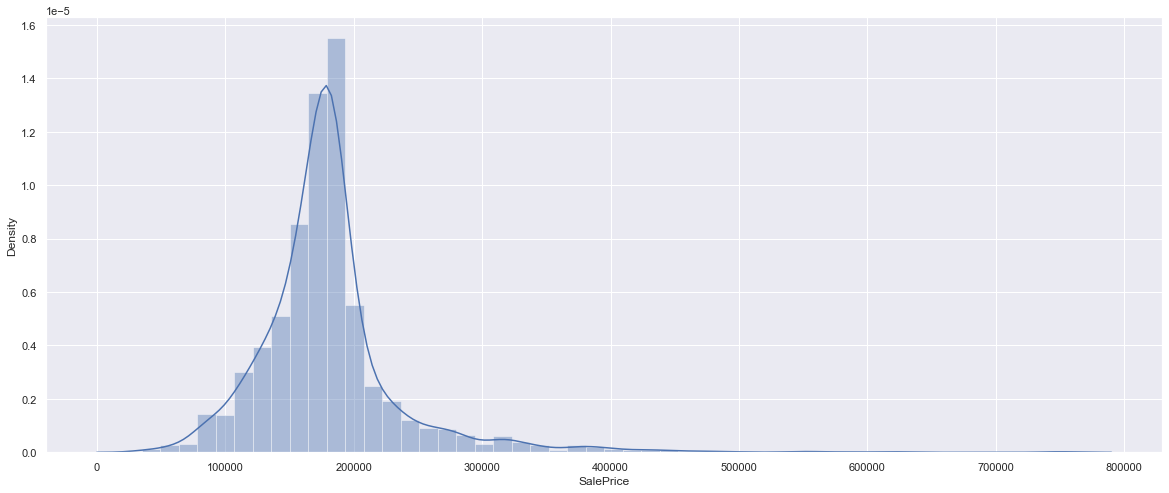

In [3]:
sns.set_theme()
plt.figure(figsize=(20,8))
sns.distplot(df['SalePrice'],kde=True);


As we can see, it is skewed to the right because it means that the median is larger than the mean, which also tells us that there are too large values ​​to the right of the data.

In [4]:
df.SalePrice.skew()

2.5492483896291027

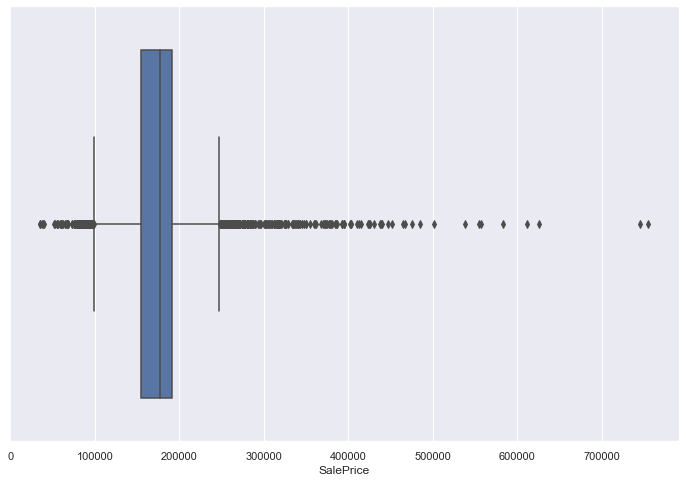

In [5]:
plt.figure(figsize = (12,8))
sns.boxplot(df['SalePrice']);

Without a doubt, it shows us that there are outliers in our target variable, so depending on how many values are in those ranges  there is a chance to drop those values.

In [6]:
df1 = df[(df.SalePrice <= 400000)]

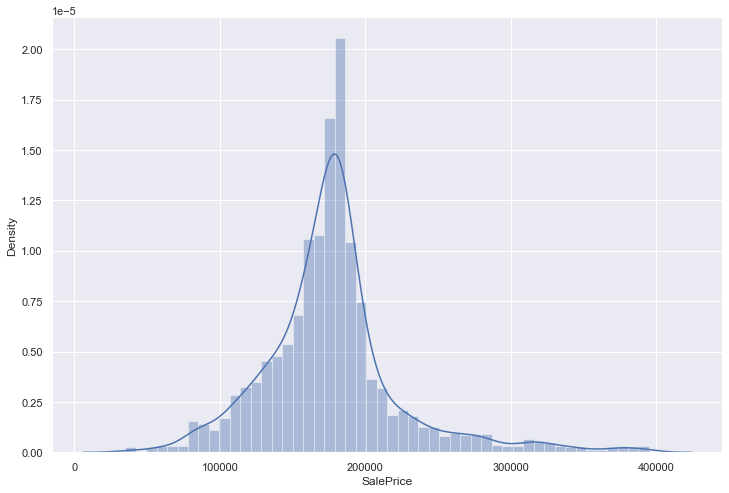

In [7]:
plt.figure(figsize = (12,8))
sns.distplot(df1.SalePrice, kde = True);

In [8]:
df1.SalePrice.skew()

1.1122605154302814

In [9]:
df1 = df.select_dtypes(['int64','float64'])

In [10]:
df1.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'FirstFlrSF', 'SecFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Now we have to apply the same analysis to the other variables

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Density'>

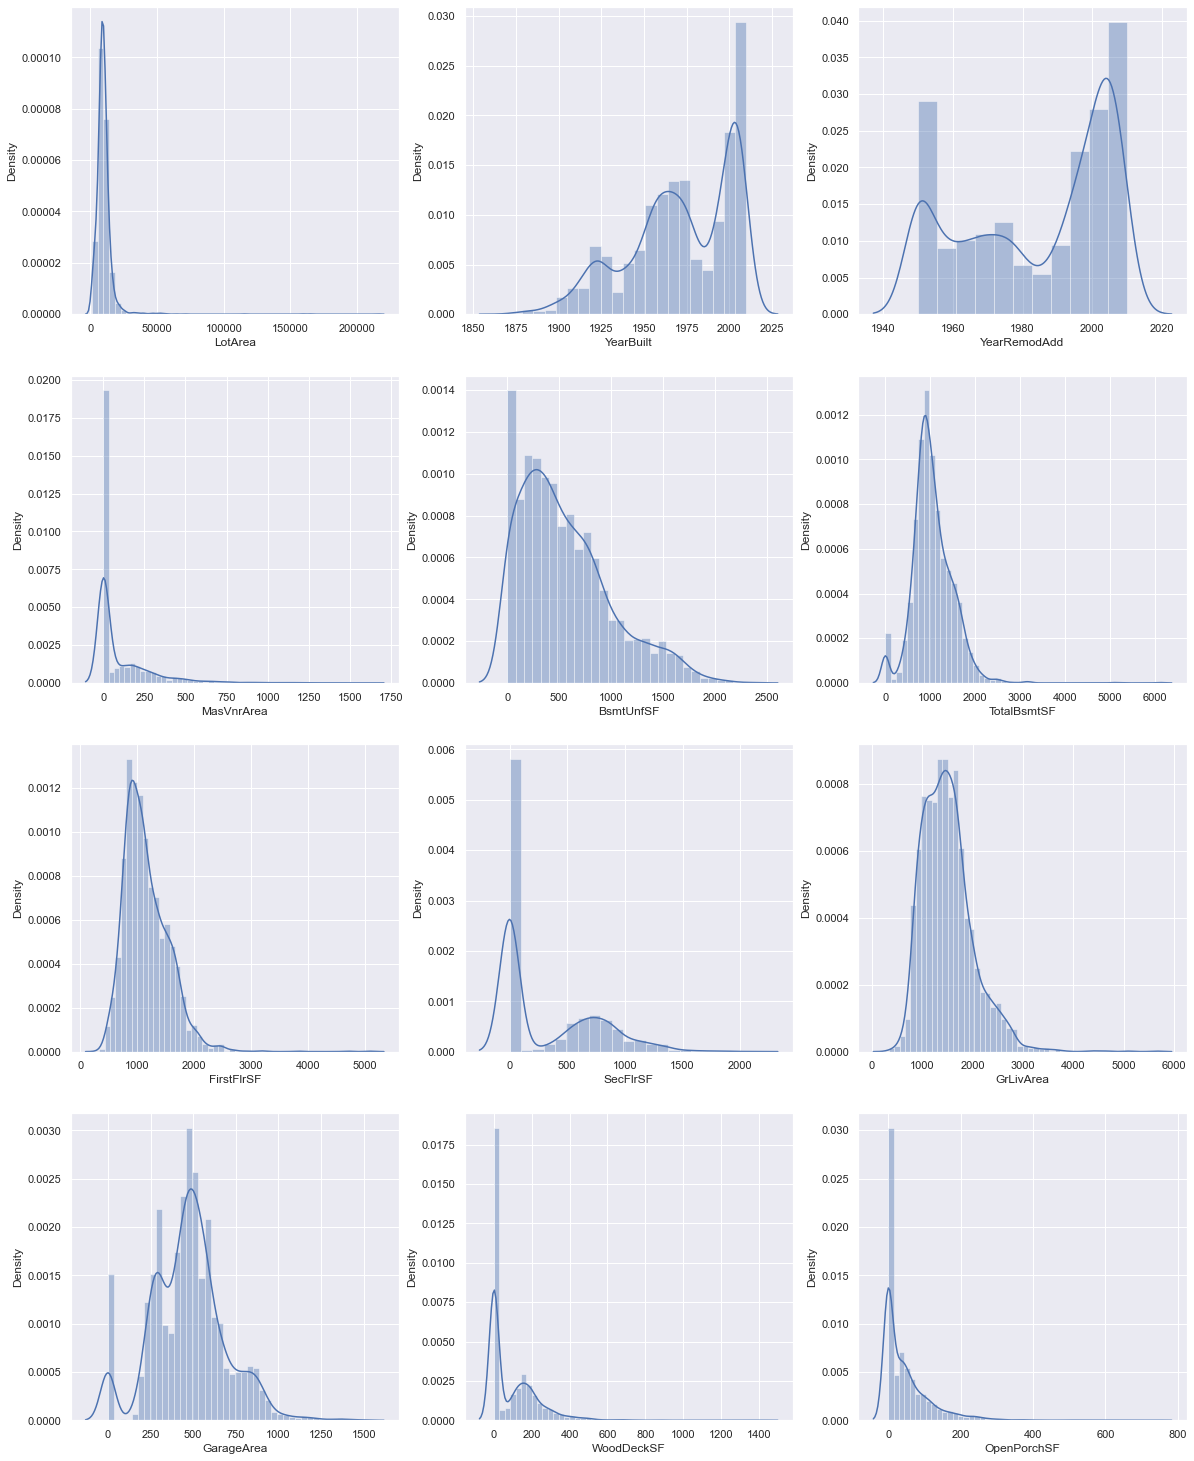

In [11]:
fig, axes = plt.subplots(4,3, figsize = (20,26))

sns.distplot(df1['LotArea'], kde= True, ax = axes[0,0])
sns.distplot(df1['YearBuilt'], kde = True, ax = axes[0,1])
sns.distplot(df1['YearRemodAdd'], kde = True , ax = axes[0,2])
sns.distplot(df1['MasVnrArea'], kde = True, ax = axes[1,0])
sns.distplot(df1['BsmtUnfSF'], kde = True, ax = axes[1,1])
sns.distplot(df1['TotalBsmtSF'], kde= True, ax = axes[1,2])
sns.distplot(df1['FirstFlrSF'], kde= True, ax = axes[2,0])
sns.distplot(df1['SecFlrSF'], kde = True, ax = axes[2,1])
sns.distplot(df1['GrLivArea'], kde = True, ax = axes[2,2])
sns.distplot(df1['GarageArea'],kde = True, ax = axes[3,0])
sns.distplot(df1['WoodDeckSF'], kde = True , ax = axes[3,1])
sns.distplot(df1['OpenPorchSF'], kde = True, ax = axes[3,2])

In [12]:
df1.skew()

MSSubClass        1.376165
LotArea          12.829025
OverallQual       0.197212
OverallCond       0.570605
YearBuilt        -0.600114
YearRemodAdd     -0.451252
MasVnrArea        2.614936
BsmtFinSF1        1.425722
BsmtFinSF2        4.147456
BsmtUnfSF         0.919824
TotalBsmtSF       1.162882
FirstFlrSF        1.470360
SecFlrSF          0.862118
LowQualFinSF     12.094977
GrLivArea         1.270010
BsmtFullBath      0.624062
BsmtHalfBath      3.932018
FullBath          0.167692
HalfBath          0.694924
BedroomAbvGr      0.326492
KitchenAbvGr      4.304467
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
GarageCars       -0.218373
GarageArea        0.241301
WoodDeckSF        1.843380
OpenPorchSF       2.536417
EnclosedPorch     4.005950
SsnPorch         11.381914
ScreenPorch       3.948723
MiscVal          21.958480
MoSold            0.195985
YrSold            0.132467
SalePrice         2.549248
dtype: float64

As we can see most of the variables are skewed to the right, we will have to make some adjustments to change this

<AxesSubplot:xlabel='OpenPorchSF'>

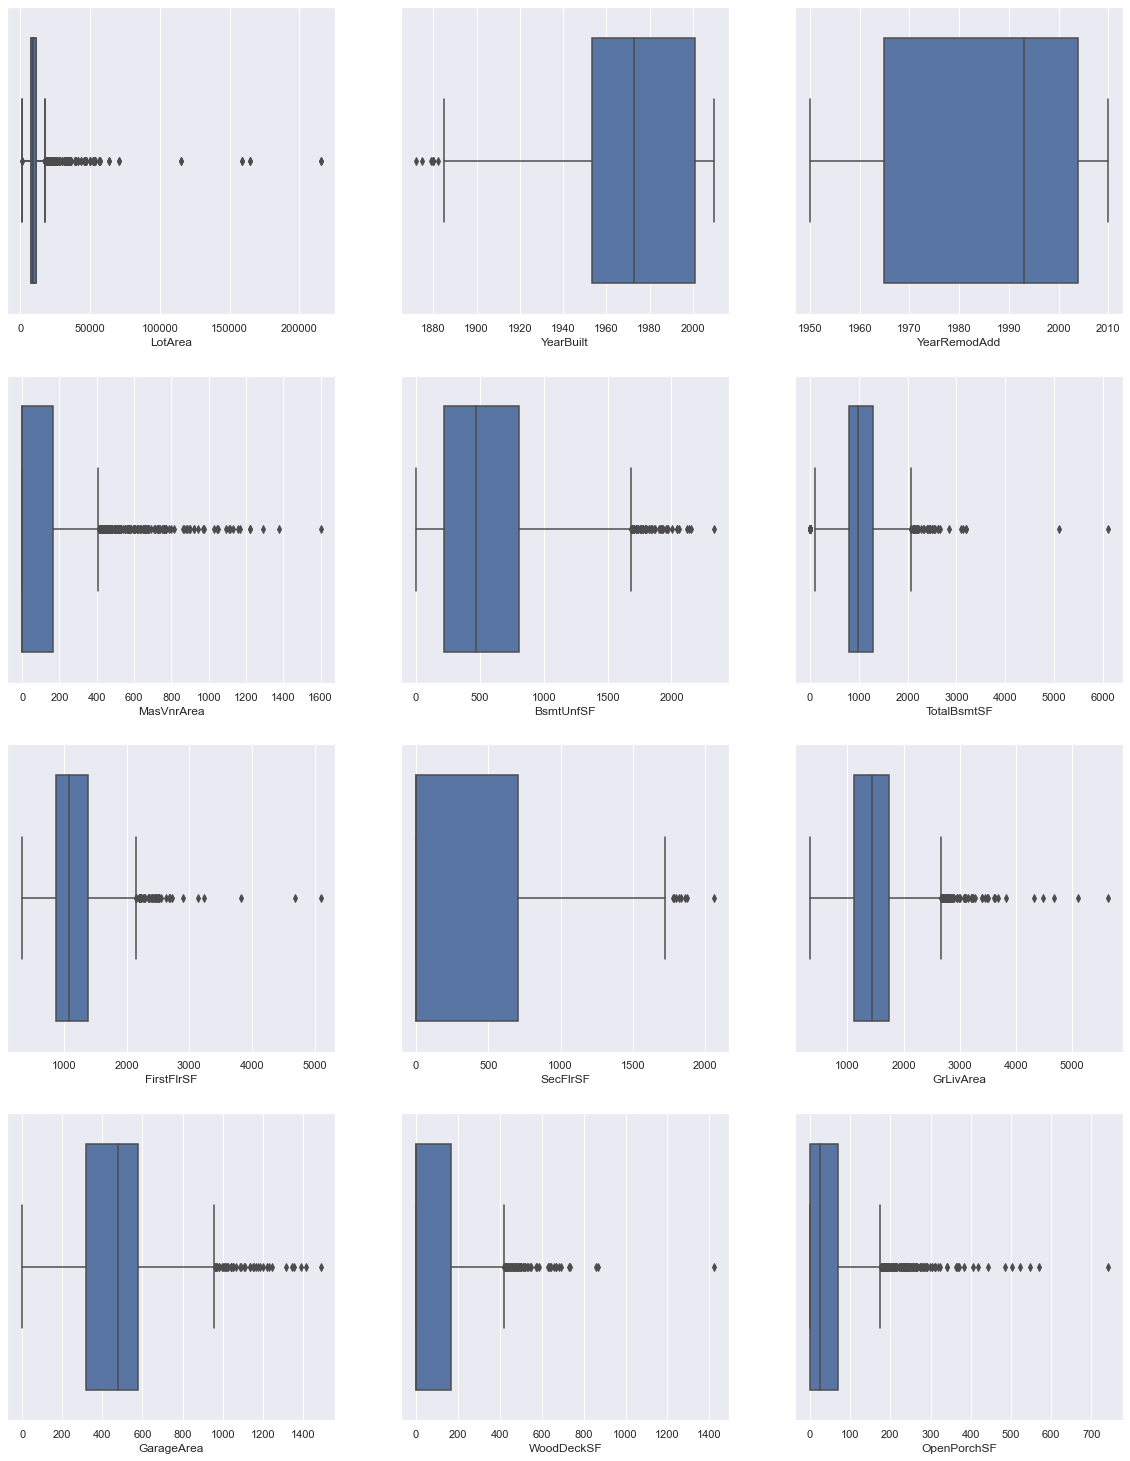

In [51]:
fig, axes = plt.subplots(4,3 , figsize= (20,26))

sns.boxplot(df['LotArea'], ax = axes[0,0])

sns.boxplot(df1['LotArea'], ax = axes[0,0])
sns.boxplot(df1['YearBuilt'], ax = axes[0,1])
sns.boxplot(df1['YearRemodAdd'],  ax = axes[0,2])
sns.boxplot(df1['MasVnrArea'],  ax = axes[1,0])
sns.boxplot(df1['BsmtUnfSF'],  ax = axes[1,1])
sns.boxplot(df1['TotalBsmtSF'],  ax = axes[1,2])
sns.boxplot(df1['FirstFlrSF'],  ax = axes[2,0])
sns.boxplot(df1['SecFlrSF'],  ax = axes[2,1])
sns.boxplot(df1['GrLivArea'],  ax = axes[2,2])
sns.boxplot(df1['GarageArea'], ax = axes[3,0])
sns.boxplot(df1['WoodDeckSF'],  ax = axes[3,1])
sns.boxplot(df1['OpenPorchSF'],  ax = axes[3,2])

There are also a lot of outliers, we will have to modify this too

#### Erasing outliers



In [60]:
df1 = df1[df1.LotArea <= 4500]
df1 = df1[df1.YearBuilt > 1890]
df1 = df1[df1.MasVnrArea <= 500]
df1 = df1[df1.BsmtUnfSF <= 1700]
df1 = df1[df1.TotalBsmtSF <= 2100]
df1 = df1[df1.FirstFlrSF <= 2300]
df1 = df1[df1.SecFlrSF <= 1600]
df1 = df1[df1.GrLivArea <= 2800]
df1 = df1[df1.GarageArea <= 950]
df1 = df1[df1.WoodDeckSF <= 430]

In [61]:
df1.skew()

MSSubClass       -1.234659
LotArea          -0.115224
OverallQual      -0.251421
OverallCond       0.950110
YearBuilt        -1.221893
YearRemodAdd     -0.726271
MasVnrArea        1.448195
BsmtFinSF1        0.867835
BsmtFinSF2        4.794175
BsmtUnfSF         0.958911
TotalBsmtSF       0.560178
FirstFlrSF        0.639692
SecFlrSF          0.160659
LowQualFinSF      7.788865
GrLivArea         0.152916
BsmtFullBath      0.363655
BsmtHalfBath      3.784882
FullBath         -0.194906
HalfBath          0.374600
BedroomAbvGr      0.107638
KitchenAbvGr     12.763171
TotRmsAbvGrd      0.357629
Fireplaces        0.545285
GarageCars       -0.808188
GarageArea       -0.842126
WoodDeckSF        0.939012
OpenPorchSF       1.890270
EnclosedPorch     6.022566
SsnPorch          9.230241
ScreenPorch       4.629754
MiscVal          15.905974
MoSold            0.447867
YrSold            0.109034
SalePrice        -0.288045
dtype: float64

In [63]:
df.shape

(2919, 73)

<AxesSubplot:xlabel='OpenPorchSF'>

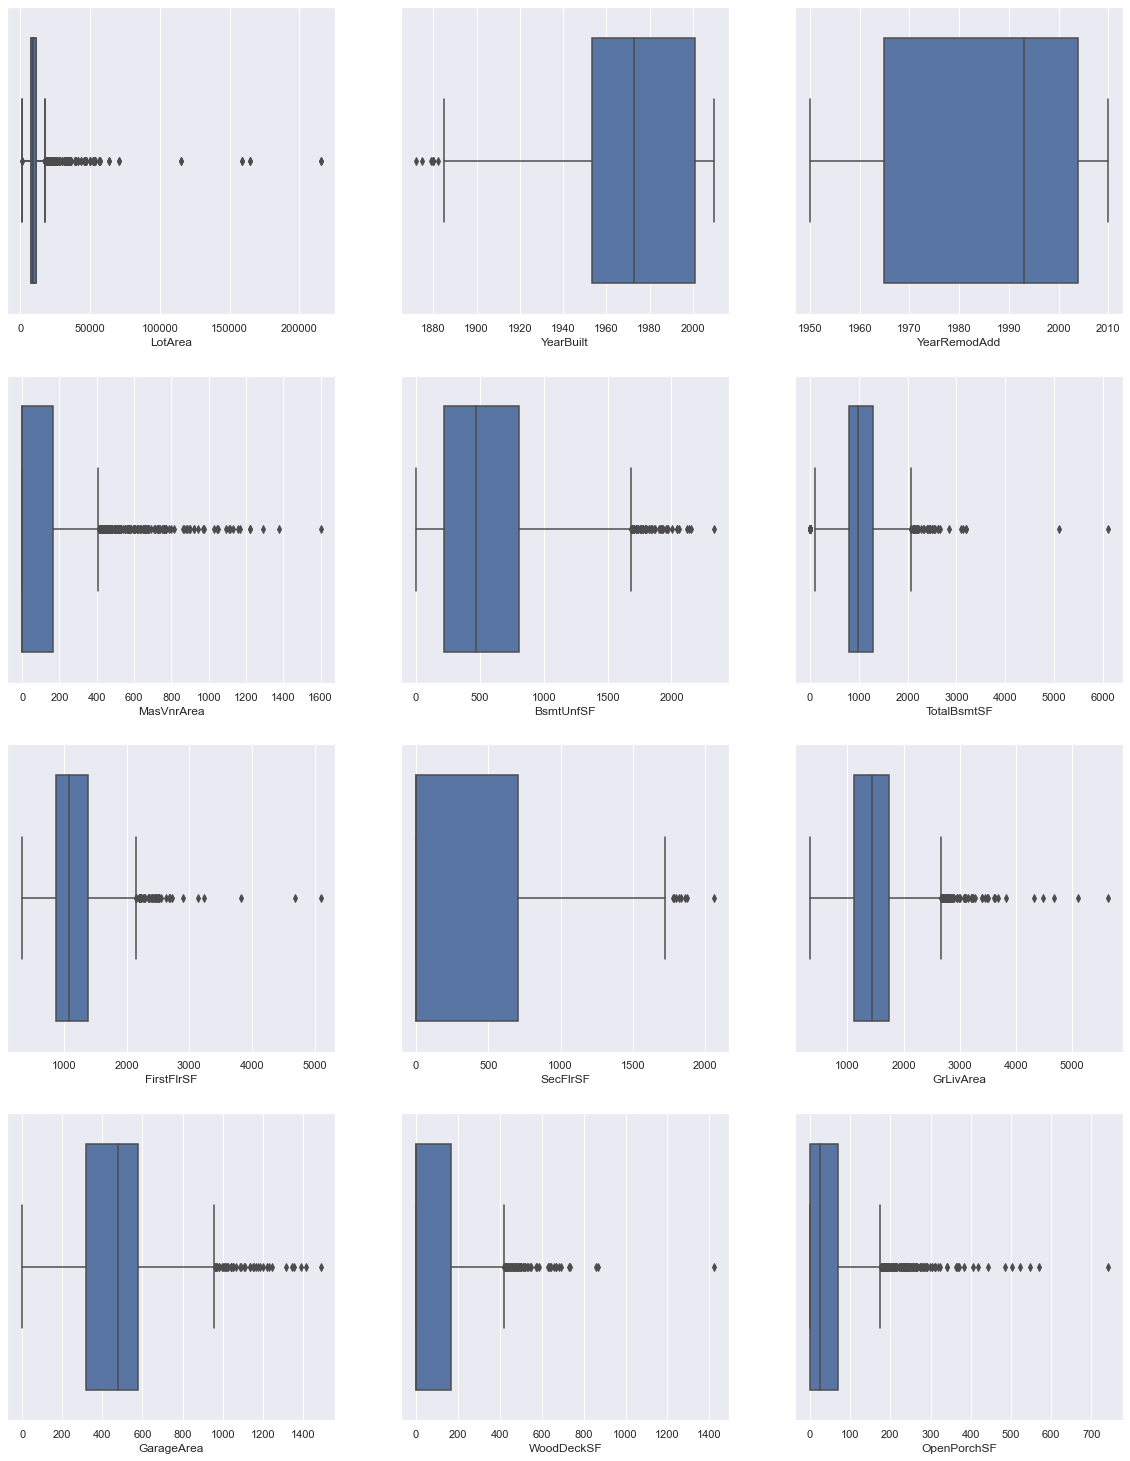

In [51]:
fig, axes = plt.subplots(4,3 , figsize= (20,26))

sns.boxplot(df['LotArea'], ax = axes[0,0])

sns.boxplot(df1['LotArea'], ax = axes[0,0])
sns.boxplot(df1['YearBuilt'], ax = axes[0,1])
sns.boxplot(df1['YearRemodAdd'],  ax = axes[0,2])
sns.boxplot(df1['MasVnrArea'],  ax = axes[1,0])
sns.boxplot(df1['BsmtUnfSF'],  ax = axes[1,1])
sns.boxplot(df1['TotalBsmtSF'],  ax = axes[1,2])
sns.boxplot(df1['FirstFlrSF'],  ax = axes[2,0])
sns.boxplot(df1['SecFlrSF'],  ax = axes[2,1])
sns.boxplot(df1['GrLivArea'],  ax = axes[2,2])
sns.boxplot(df1['GarageArea'], ax = axes[3,0])
sns.boxplot(df1['WoodDeckSF'],  ax = axes[3,1])
sns.boxplot(df1['OpenPorchSF'],  ax = axes[3,2])

## Correlation

In [62]:
corr = df1.corr()
corr.SalePrice[:]

MSSubClass       0.008282
LotArea          0.178796
OverallQual      0.464298
OverallCond     -0.139540
YearBuilt        0.382040
YearRemodAdd     0.353360
MasVnrArea       0.048823
BsmtFinSF1       0.162727
BsmtFinSF2      -0.096318
BsmtUnfSF        0.254828
TotalBsmtSF      0.457483
FirstFlrSF       0.443815
SecFlrSF        -0.028484
LowQualFinSF    -0.002193
GrLivArea        0.485449
BsmtFullBath     0.065882
BsmtHalfBath     0.127315
FullBath         0.405932
HalfBath         0.004602
BedroomAbvGr     0.056360
KitchenAbvGr    -0.038344
TotRmsAbvGrd     0.272462
Fireplaces       0.267890
GarageCars       0.500242
GarageArea       0.453921
WoodDeckSF       0.157746
OpenPorchSF      0.145975
EnclosedPorch   -0.151409
SsnPorch         0.003275
ScreenPorch      0.093909
MiscVal          0.012964
MoSold           0.115063
YrSold          -0.084684
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [64]:
corr.shape

(34, 34)

In [15]:
df2 = np.log10(df1)

In [16]:
df2.SalePrice.skew()

-0.15038107517005223

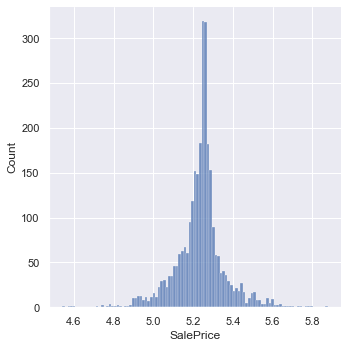

In [19]:
sns.displot(df2.SalePrice)